Visualization

In [6]:
!pip install open3d matplotlib numpy Vispy PyQt5

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file1 = '000000.bin'
# label_file = '000000.label'

cloud1 = np.fromfile(file1, dtype=np.float32)
print(cloud1.shape)

cloud1 = cloud1.reshape((-1, 4))
print(cloud1.shape)


(524288,)
(131072, 4)


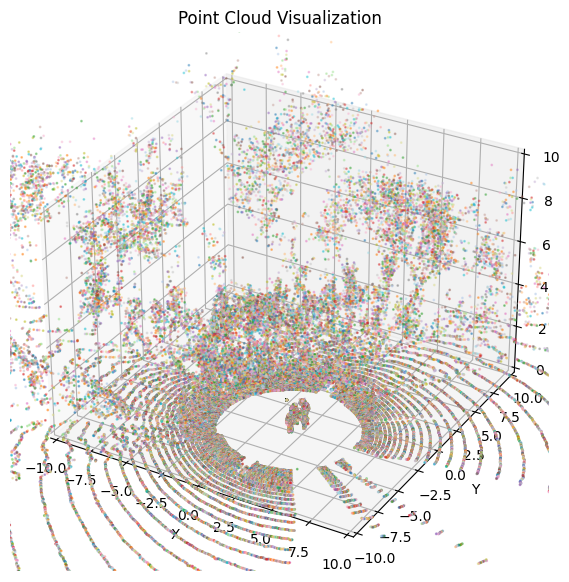

In [5]:
prob = np.random.random((20, 2048 * 64))  # Mock softmax scores
prob = prob / np.sum(prob, axis=0, keepdims=True)

xyz = cloud1[:, :3]
class_predictions = np.argmax(prob.T, axis=1)

num_classes = 20
colormap = plt.get_cmap('tab20', num_classes)
colors = colormap(class_predictions / num_classes)[:,:3]

# Plotting with plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=colors, marker='o', s=1)

plt.title('Point Cloud Visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 10])

plt.show()

Test

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader

# Assumuptions
from dataset import LidarDataset
from model import SalsaNext



def main():
    model_path = 'path_to_trained_model.pth'
    test_data_path = 'path_to_test_data_folder'

    model = SalsaNext(num_classes=20)
    model.load_state_dict(torch.load(model_path))
    model.eval()

    test_dataset = LidarDataset(test_data_path)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    with torch.no_grad():
        for data in loader:
            cloud, label = data['cloud'], data['label']
            softmax = model(cloud)
            # draw the output with cloud colored for each class

if __name__ == '__main__':
    main()


Get losses from the training and plot

In [ ]:
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()  # or save

In [ ]:
import glfw
from OpenGL.GL import *
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt


image_data = np.random.uniform(0, 100, size=(1024 * 64, 5))


prob = np.random.random((1024 * 64, 20))  # Mock softmax scores
prob = prob / np.sum(prob, axis=1, keepdims=True)  # Normalize to get probabilities

# Extract XYZ coordinates
xyz = image_data[:, :3]

# Get class predictions from softmax probabilities
class_predictions = np.argmax(prob, axis=1)

# Create a color map for visualizing classes
num_classes = 20
colormap = plt.get_cmap('tab20', num_classes)
colors = colormap(class_predictions / num_classes)[:,:3]

# Create Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
pcd.colors = o3d.utility.Vector3dVector(colors)


# Plot using Open3D
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)  # Create a window that is not displayed
vis.add_geometry(pcd)
vis.update_geometry(pcd)
vis.poll_events()
vis.update_renderer()
vis.capture_screen_image("point_cloud.png")
vis.destroy_window()



Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl, xcb.



In [ ]:
import numpy as np
import vispy
from vispy import scene
from vispy.scene import visuals, SceneCanvas
from matplotlib import pyplot as plt
from vispy.color import ColorArray

class LaserScanVis:
    """Class that creates and handles a visualizer for a point cloud with semantic segmentation."""

    def __init__(self, points, class_predictions, num_classes=20):
        self.points = points
        self.class_predictions = class_predictions
        self.num_classes = num_classes

        # Create a colormap
        self.colormap = plt.get_cmap('tab20', num_classes)

        # Setup Vispy Canvas
        self.canvas = SceneCanvas(keys='interactive', show=True)
        self.view = self.canvas.central_widget.add_view()

        # Create scatter plot
        self.scatter = visuals.Markers()
        self.view.add(self.scatter)

        # Set camera
        self.view.camera = scene.cameras.TurntableCamera(up='z')

        # Update the visual elements
        self.update_visuals()

    def update_visuals(self):
        """Update the scatter plot with new points and colors."""
        colors = self.get_colors(self.class_predictions)
        self.scatter.set_data(self.points, face_color=colors, size=5)

    def get_colors(self, class_predictions):
        colors = self.colormap(class_predictions / self.num_classes)[:,:3]  # Normalize and remove alpha
        return colors

    def run(self):
        vispy.app.run()

    def key_press(self, event):
        if event.key == 'Q' or event.key == 'Escape':
            self.canvas.close()
            vispy.app.quit()



points = np.random.uniform(0, 100, size=(1024 * 64, 5))
prob = np.random.random((1024 * 64, 20))
prob = prob / np.sum(prob, axis=1, keepdims=True)
xyz = image_data[:, :3]
class_predictions = np.argmax(prob, axis=1)


# Create the visualizer instance
vis = LaserScanVis(points, class_predictions)
vis.run()



Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl, xcb.

